# Elo Merchant Category Recommendation EDA

This notebook performs EDA on Elo Merchant Category Recommendation competition dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'dark')
import warnings
warnings.simplefilter("ignore")

### Function to reduce the memory usage by any pandas dataframe variable

In [2]:
#https://www.kaggle.com/c/champs-scalar-coupling/discussion/96655
def reduce_mem_usage(df, verbose=True):
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 *
                                                                                      (start_mem - end_mem) / start_mem))
    return df

## Loading the Datasets

In [3]:
train_info = pd.read_excel('Data Dictionary.xlsx', sheet_name = 'train')
print("Details of train dataset columns:")
train_info

Details of train dataset columns:


,train.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Unique card identifier
3,first_active_month,"'YYYY-MM', month of first purchase"
4,feature_1,Anonymized card categorical feature
5,feature_2,Anonymized card categorical feature
6,feature_3,Anonymized card categorical feature
7,target,Loyalty numerical score calculated 2 months af...


In [4]:
historical_transactions_info = pd.read_excel('Data Dictionary.xlsx', sheet_name = 'history')
print("Details of historical transactions dataset columns:")
historical_transactions_info

Details of historical transactions dataset columns:


,historical_transactions.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Card identifier
3,month_lag,month lag to reference date
4,purchase_date,Purchase date
5,authorized_flag,"Y' if approved, 'N' if denied"
6,category_3,anonymized category
7,installments,number of installments of purchase
8,category_1,anonymized category
9,merchant_category_id,Merchant category identifier (anonymized )


In [5]:
new_transactions_info = pd.read_excel('Data Dictionary.xlsx', sheet_name = 'new_merchant_period')
print("Details of new transactions dataset columns:")
new_transactions_info

Details of new transactions dataset columns:


,new_merchant_period.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Card identifier
3,month_lag,month lag to reference date
4,purchase_date,Purchase date
5,authorized_flag,"Y' if approved, 'N' if denied"
6,category_3,anonymized category
7,installments,number of installments of purchase
8,category_1,anonymized category
9,merchant_category_id,Merchant category identifier (anonymized )


In [6]:
Historical_Categorical_Columns = ["card_id", "authorized_flag", "category_1", "category_3", "installments", "merchant_id",
                                  "merchant_category_id", "subsector_id", "city_id", "state_id"]
Historical_Categorical_Dtypes = {col: "category" for col in Historical_Categorical_Columns}
Train_Categorical_Columns = ["card_id", "feature_1", "feature_2", "feature_3"]
Train_Categorical_Dtypes = {col: "category" for col in Train_Categorical_Columns}

train = pd.read_csv("train.csv", parse_dates = ['first_active_month'], dtype = Train_Categorical_Dtypes)
test = pd.read_csv("test.csv", parse_dates = ['first_active_month'], dtype = Train_Categorical_Dtypes)
historical_transactions = pd.read_csv("historical_transactions.csv", parse_dates = ['purchase_date'],
                                      dtype = Historical_Categorical_Dtypes)
new_transactions = pd.read_csv("new_merchant_transactions.csv", parse_dates = ['purchase_date'],
                                      dtype = Historical_Categorical_Dtypes)

In [7]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)
historical_transactions = reduce_mem_usage(historical_transactions)
new_transactions = reduce_mem_usage(new_transactions)

Mem. usage decreased to 12.88 Mb (8.2% reduction)
Mem. usage decreased to  6.74 Mb (0.0% reduction)
Mem. usage decreased to 937.32 Mb (33.5% reduction)
Mem. usage decreased to 78.12 Mb (31.3% reduction)


In [8]:
print("Number of observations in trainset: ",train.shape[0])
print("Number of observations in testset: ",test.shape[0])
print("Number of observations in historical transactions dataset: ",historical_transactions.shape[0])
print("Number of observations in new transactions dataset: ",new_transactions.shape[0])

Number of observations in trainset:  201917
Number of observations in testset:  123623
Number of observations in historical transactions dataset:  29112361
Number of observations in new transactions dataset:  1963031


## Train and Test set

In [9]:
print("Train Info")
print("*" * 20)
train.info()

Train Info
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   first_active_month  201917 non-null  datetime64[ns]
 1   card_id             201917 non-null  category      
 2   feature_1           201917 non-null  category      
 3   feature_2           201917 non-null  category      
 4   feature_3           201917 non-null  category      
 5   target              201917 non-null  float16       
dtypes: category(4), datetime64[ns](1), float16(1)
memory usage: 12.9 MB


In [10]:
print("Test Info")
print("*" * 20)
test.info()

Test Info
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   first_active_month  123622 non-null  datetime64[ns]
 1   card_id             123623 non-null  category      
 2   feature_1           123623 non-null  category      
 3   feature_2           123623 non-null  category      
 4   feature_3           123623 non-null  category      
dtypes: category(4), datetime64[ns](1)
memory usage: 6.7 MB


In [11]:
print("Name of columns in trainset: ", train.columns.values)
print("Name of columns in testset: ", test.columns.values)

Name of columns in trainset:  ['first_active_month' 'card_id' 'feature_1' 'feature_2' 'feature_3'
 'target']
Name of columns in testset:  ['first_active_month' 'card_id' 'feature_1' 'feature_2' 'feature_3']


As we can see, both train and test dataset have same columns except the test set is missing target columns which needs to be predicted.

In [12]:
print(train.isnull().sum())

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64


In [13]:
print(test.isnull().sum())

first_active_month    1
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64


There are no null values in the train set. However in the test set there is one null value in 'first_active_month' column. Since there is only one null value we can look for all the observations that match the same 'feature_1', 'feature_2' and 'feature_3' values as null-value observation and impute it with the 'first_active_month' that corresponds to their mode.

##### Target Column in train dataset

In [14]:
print("Target description:\n", train['target'].describe())

Target description:
 count    201917.000000
mean               NaN
std           0.000000
min         -33.218750
25%          -0.883301
50%          -0.023438
75%           0.765625
max          17.968750
Name: target, dtype: float64


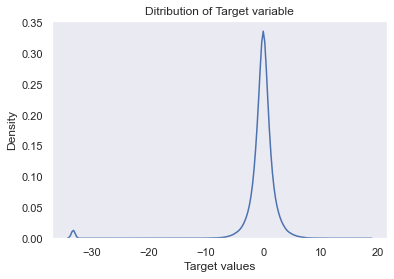

In [15]:
sns.kdeplot(train['target'])
plt.title("Ditribution of Target variable")
plt.xlabel("Target values")
plt.show()

In [16]:
print("Number of outlier observations:", train[train['target'] < -25]['target'].shape[0])

Number of outlier observations: 2207


The target values are normally distributed around 0 with presence of 2207 extreme outliers with value around -33. These outliers will affect the performance of our model and have to be dealt with. We can either drop these observation which will lead to loss of information or we can add an additional outlier feature for our model.

As we can see, target has a continuous real value, therefore we have to train a regression model. Elo has set the Root mean squared error (RMSE) as performance metric for the model. RMSE is defined by the equation:
$$RSME= \sqrt{\frac{1}{n} \sum \limits_{i=1}^{n}(y_{i}-\hat{y_{i}} )^{2}}$$,
where n is the number of card_ids, $y_{i}$ is the actual Loyalty score of card_id i and $\hat{y}_{i}$ is the predicted Loyalty score for card_id i.

##### Feature columns in train and test set

In [17]:
print("Unique feature 1 categories", np.sort(train['feature_1'].unique()))
print("Unique feature 2 categories", np.sort(train['feature_2'].unique()))
print("Unique feature 3 categories", np.sort(train['feature_3'].unique()))

Unique feature 1 categories ['1' '2' '3' '4' '5']
Unique feature 2 categories ['1' '2' '3']
Unique feature 3 categories ['0' '1']


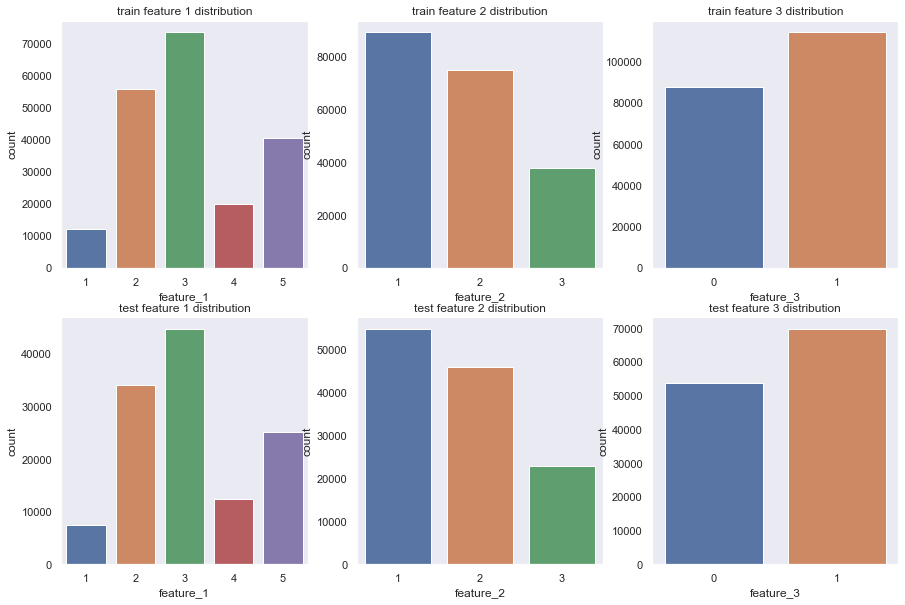

In [18]:
plt.figure(figsize = [15,10])
plt.subplot(2,3,1)
sns.countplot(data = train, x = "feature_1")
plt.title("train feature 1 distribution")
plt.subplot(2,3,2)
sns.countplot(data = train, x = "feature_2")
plt.title("train feature 2 distribution")
plt.subplot(2,3,3)
sns.countplot(data = train, x = "feature_3")
plt.title("train feature 3 distribution")
plt.subplot(2,3,4)
sns.countplot(data = test, x = "feature_1")
plt.title("test feature 1 distribution")
plt.subplot(2,3,5)
sns.countplot(data = test, x = "feature_2")
plt.title("test feature 2 distribution")
plt.subplot(2,3,6)
sns.countplot(data = test, x = "feature_3")
plt.title("test feature 3 distribution")
plt.show()

The distribution of features in both train and test set is similar which means that there was no time based splitting of train and test set and the features are not time based.

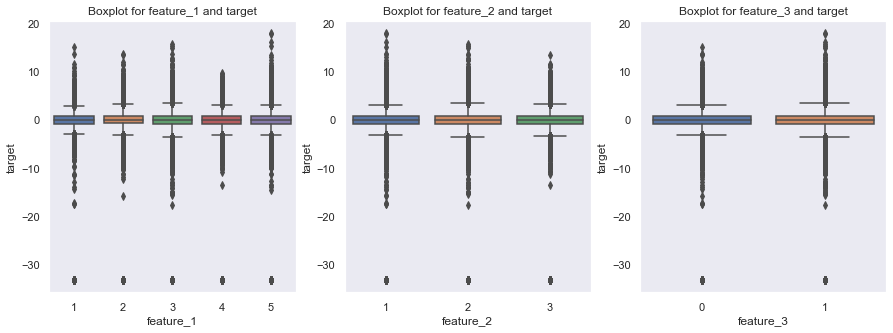

In [19]:
plt.figure(figsize = [15,5])
plt.subplot(1,3,1)
sns.boxplot(data = train, x = "feature_1", y = "target")
plt.title("Boxplot for feature_1 and target")
plt.subplot(1,3,2)
sns.boxplot(data = train, x = "feature_2", y = "target")
plt.title("Boxplot for feature_2 and target")
plt.subplot(1,3,3)
sns.boxplot(data = train, x = "feature_3", y = "target")
plt.title("Boxplot for feature_3 and target")
plt.show()

For every feature category, distribution for the target variable is similar which is normally distributed around 0. This could mean, that these features aren't really good at predicting target and we'll need other features and feature engineering.

##### First active month column in train and test set

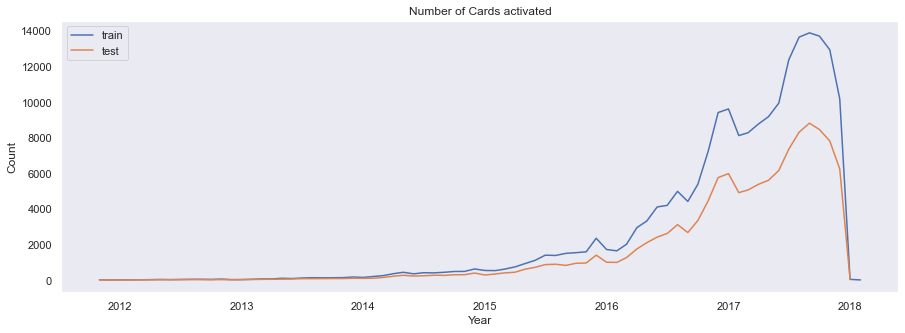

In [20]:
tr = train['first_active_month'].value_counts().sort_index()
te = test['first_active_month'].value_counts().sort_index()
plt.figure(figsize = [15,5])
sns.lineplot(x = tr.index, y = tr.values, label = "train")
sns.lineplot(x = te.index, y = te.values, label = "test")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Number of Cards activated")
plt.show()

The number of new cards activated is increasing linearly with time except few dips. The train and test distributions are same except for the frequency which means there was no time based splitting. The dip in year 2018 can be due to unavailability of data for that year.

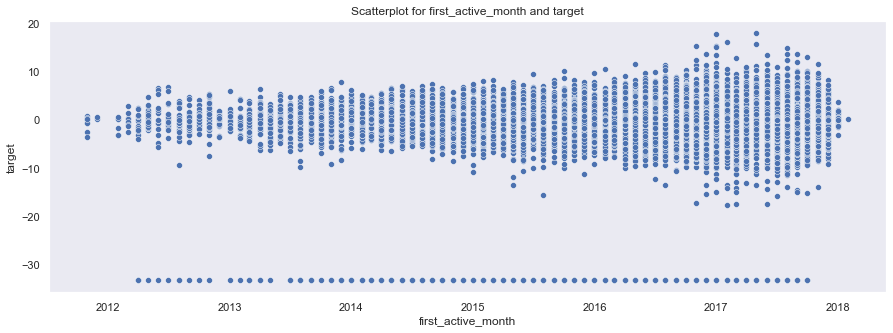

In [21]:
plt.figure(figsize = [15,5])
sns.scatterplot(data = train, x = "first_active_month", y = "target")
plt.title("Scatterplot for first_active_month and target")
plt.show()

The variance of target variable is increasing with increase in first transaction month though the distribution is still centered around 0. The presence of outliers in target is consistent from the beginning and not some random mistake.

## Historical and New Transactions

In [22]:
print("Historical transactions")
print("*" * 20)
historical_transactions.info()

Historical transactions
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Dtype         
---  ------                -----         
 0   authorized_flag       category      
 1   card_id               category      
 2   city_id               category      
 3   category_1            category      
 4   installments          category      
 5   category_3            category      
 6   merchant_category_id  category      
 7   merchant_id           category      
 8   month_lag             int8          
 9   purchase_amount       float32       
 10  purchase_date         datetime64[ns]
 11  category_2            float16       
 12  state_id              category      
 13  subsector_id          category      
dtypes: category(10), datetime64[ns](1), float16(1), float32(1), int8(1)
memory usage: 937.3 MB


In [23]:
print("New transactions")
print("*" * 20)
new_transactions.info()

New transactions
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype         
---  ------                -----         
 0   authorized_flag       category      
 1   card_id               category      
 2   city_id               category      
 3   category_1            category      
 4   installments          category      
 5   category_3            category      
 6   merchant_category_id  category      
 7   merchant_id           category      
 8   month_lag             int8          
 9   purchase_amount       float16       
 10  purchase_date         datetime64[ns]
 11  category_2            float16       
 12  state_id              category      
 13  subsector_id          category      
dtypes: category(10), datetime64[ns](1), float16(2), int8(1)
memory usage: 78.1 MB


In [24]:
print("Name of columns in historical transaction dataset: ", historical_transactions.columns.values)
print("Name of columns in new transaction dataset: ", new_transactions.columns.values)

Name of columns in historical transaction dataset:  ['authorized_flag' 'card_id' 'city_id' 'category_1' 'installments'
 'category_3' 'merchant_category_id' 'merchant_id' 'month_lag'
 'purchase_amount' 'purchase_date' 'category_2' 'state_id' 'subsector_id']
Name of columns in new transaction dataset:  ['authorized_flag' 'card_id' 'city_id' 'category_1' 'installments'
 'category_3' 'merchant_category_id' 'merchant_id' 'month_lag'
 'purchase_amount' 'purchase_date' 'category_2' 'state_id' 'subsector_id']


Both historical and new transactions have similar columns, only difference is historical transactions contain up to 3 months worth of historical transactions for each card_id whereas new merchant transactions contain two months worth of transactions for each card_id that cardholder made at new merchants that were not provided in the historical transactions.

In [25]:
print(historical_transactions.isnull().sum())

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64


In [26]:
print("Percentage of historical_transactions merchant_id column with null value:",
      (historical_transactions[historical_transactions['merchant_id'].isnull()].shape[0] / historical_transactions.shape[0])
      * 100)
print("Percentage of historical_transactions category_2 column with null value:",
      (historical_transactions[historical_transactions['category_2'].isnull()].shape[0] / historical_transactions.shape[0])
      * 100)
print("Percentage of historical_transactions category_3 column with null value:",
      (historical_transactions[historical_transactions['category_3'].isnull()].shape[0] / historical_transactions.shape[0])
      * 100)

Percentage of historical_transactions merchant_id column with null value: 0.4756776683278969
Percentage of historical_transactions category_2 column with null value: 9.1125003568072
Percentage of historical_transactions category_3 column with null value: 0.6119702898710276


In [27]:
print(new_transactions.isnull().sum())

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64


In [28]:
print("Percentage of new_transactions merchant_id column with null value:",
      (new_transactions[new_transactions['merchant_id'].isnull()].shape[0] / new_transactions.shape[0]) * 100)
print("Percentage of new_transactions category_2 column with null value:",
      (new_transactions[new_transactions['category_2'].isnull()].shape[0] / new_transactions.shape[0]) * 100)
print("Percentage of new_transactions category_3 column with null value:",
      (new_transactions[new_transactions['category_3'].isnull()].shape[0] / new_transactions.shape[0]) * 100)

Percentage of new_transactions merchant_id column with null value: 1.3354857870303627
Percentage of new_transactions category_2 column with null value: 5.692472508075522
Percentage of new_transactions category_3 column with null value: 2.8487578647509895


Both historical and new transactions have null values in category_2, category_3 and merchant_id columns. There are around 5-10 percent null values in category_2 columns of historical and new transactions while category_3 and merchant_id columns have relatively smaller percentage of null values. These null values have to be imputed instead of dropping the observations to prevent loss of information. Since category_2 and category_3 are categorical features, we can train a classification model from rest of the columns to predict values of null category_2 and category_3. Also for simpler approach, we can just make null values as another category for category_2 and category_3 columns. For missing merchant_id, we will find merchant_ids with similar merchant_category_id, subsector_id, city_id and state_id and impute their mode to null merchant_ids.

##### Merging target column from train dataset to historical transactions and new transactions on card_id

We have to predict target which is only present in train set. To analyze relation between columns of historical and new transactions with the target variable, we are merging the target column from train set to historical and new transactions on card_ids.

In [29]:
historical_transactions = pd.merge(historical_transactions, train[['card_id','target']], how = "left", on = "card_id")
new_transactions = pd.merge(new_transactions, train[['card_id','target']], how = "left", on = "card_id")

##### Authorized flag column in historical and new transactions

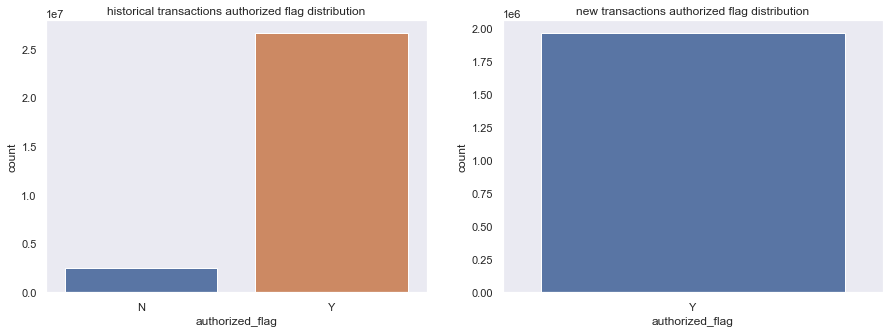

In [30]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.countplot(data = historical_transactions, x = "authorized_flag")
plt.title("historical transactions authorized flag distribution")
plt.subplot(1,2,2)
sns.countplot(data = new_transactions, x = "authorized_flag")
plt.title("new transactions authorized flag distribution")
plt.show()

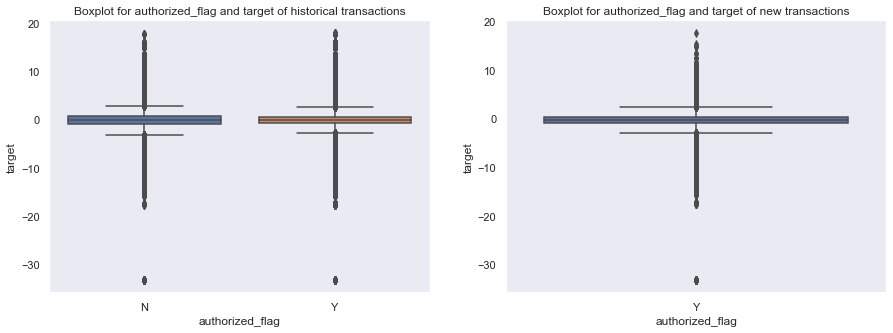

In [31]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.boxplot(data = historical_transactions, x = "authorized_flag", y = "target")
plt.title("Boxplot for authorized_flag and target of historical transactions")
plt.subplot(1,2,2)
sns.boxplot(data = new_transactions, x = "authorized_flag", y = "target")
plt.title("Boxplot for authorized_flag and target of new transactions")
plt.show()

There are authorized and declined transactions in historical transactions whereas new transactions only has authorized transactions. There is large difference between number of authorized and declined transactions in historical transactions. Most of declined transactions can be fraud transactions which can affect the performance of the model. The distributions of target with respect to athorised flag are similar for authorized and declined historical and new transactions. Engineering separate features for authorized and declined transactions in historical transactions might help the model. 

##### Installments column in historical and new transactions

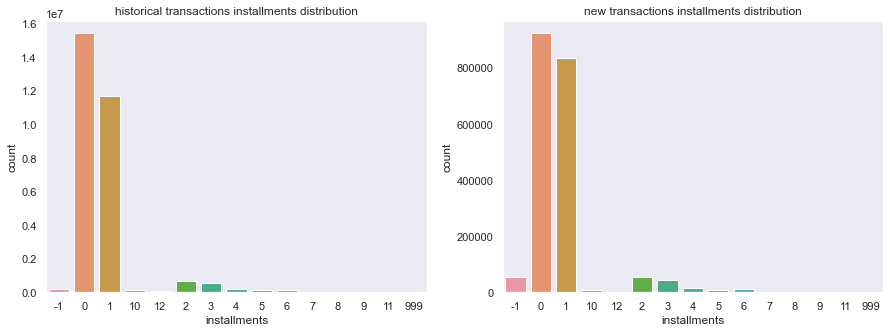

In [32]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.countplot(data = historical_transactions, x = "installments")
plt.title("historical transactions installments distribution")
plt.subplot(1,2,2)
sns.countplot(data = new_transactions, x = "installments")
plt.title("new transactions installments distribution")
plt.show()

Most of the historical transactions and new transactions have installment values of 0 and 1. There are also some unusual installment values of -1 and 999.

In [33]:
print("Number of 999 installments historical transactions:", historical_transactions[historical_transactions['installments']
                                                                                     == '999']['installments'].shape[0])
print("Number of -1 installments historical transactions:", historical_transactions[historical_transactions['installments']
                                                                                     == '-1']['installments'].shape[0])
print("Number of 999 installments new transactions:", new_transactions[new_transactions["installments"]
                                                                                     == '999']['installments'].shape[0])
print("Number of -1 installments new transactions:", new_transactions[new_transactions["installments"]
                                                                                     == '-1']['installments'].shape[0])

Number of 999 installments historical transactions: 188
Number of -1 installments historical transactions: 178159
Number of 999 installments new transactions: 2
Number of -1 installments new transactions: 55922


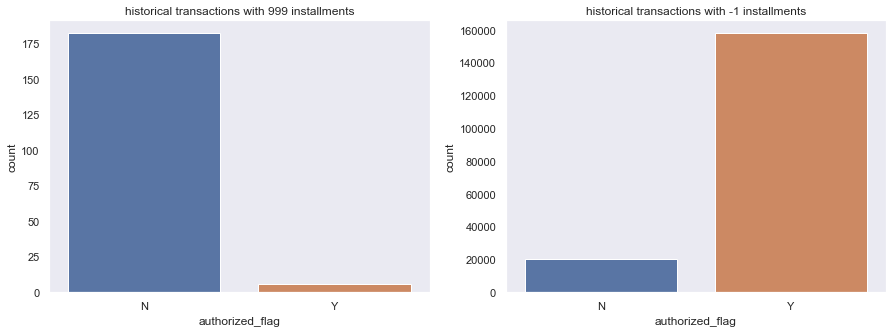

In [34]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.countplot(data = historical_transactions[historical_transactions['installments'] == '999'], x = "authorized_flag")
plt.title("historical transactions with 999 installments")
plt.subplot(1,2,2)
sns.countplot(data = historical_transactions[historical_transactions['installments'] == '-1'], x = "authorized_flag")
plt.title("historical transactions with -1 installments")
plt.show()

The number of historical transactions and new transactions with installment value of -1 are much more than transactions with installment value of 999. Also, most of these -1 installment transactions are authorized meaning these transactions might denote some sort of advance payments or something else. But most of the transactions with installment value of 999 are declined, so these transactions might be fraud.

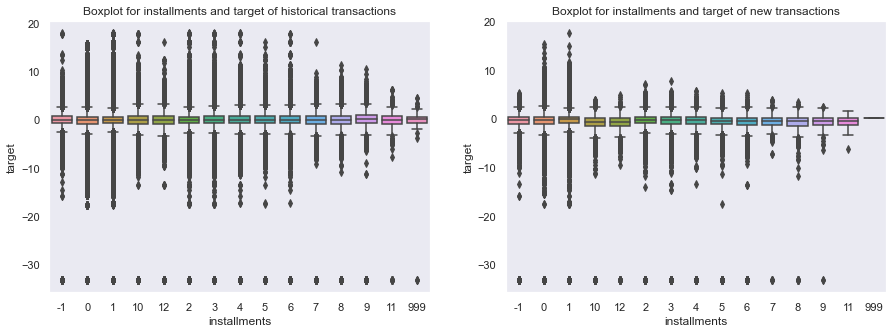

In [35]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.boxplot(data = historical_transactions, x = "installments", y = "target")
plt.title("Boxplot for installments and target of historical transactions")
plt.subplot(1,2,2)
sns.boxplot(data = new_transactions, x = "installments", y = "target")
plt.title("Boxplot for installments and target of new transactions")
plt.show()

The distributions of target with respect to different installments shows small dissimilarities for both historical and new transactions. Engineering different features from installments might be useful for the model.

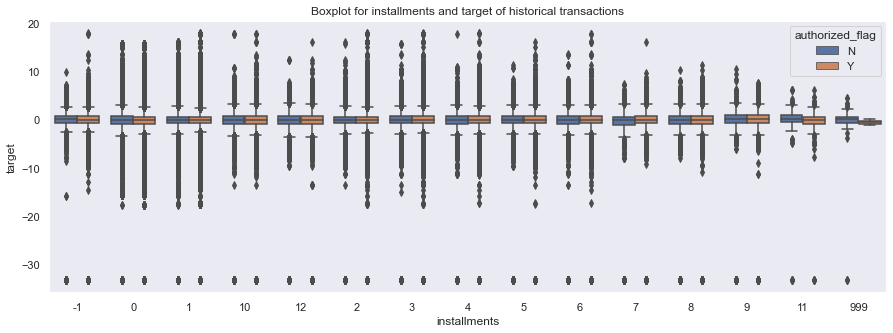

In [36]:
plt.figure(figsize = [15,5])
sns.boxplot(data = historical_transactions, x = "installments", y = "target", hue = "authorized_flag")
plt.title("Boxplot for installments and target of historical transactions")
plt.show()

There are small dissimilarities between distributions of target with respect to installments for authorized and declined historical transactions, specially for higher number of installments. The grouped feature of authorized flag and installments will be helpful for the model.

##### Purchase amount column in historical and new transactions

In [37]:
historical_transactions['purchase_amount'].describe()

count    2.911236e+07
mean     3.640094e-02
std      1.123522e+03
min     -7.469078e-01
25%     -7.203559e-01
50%     -6.883495e-01
75%     -6.032543e-01
max      6.010604e+06
Name: purchase_amount, dtype: float64

In [38]:
new_transactions['purchase_amount'].describe()

count    1.963031e+06
mean              NaN
std               NaN
min     -7.470703e-01
25%     -7.167969e-01
50%     -6.748047e-01
75%     -5.815430e-01
max      2.632500e+02
Name: purchase_amount, dtype: float64

In [39]:
for i in range(0,100,10):
    print(i, " : ", np.percentile(historical_transactions['purchase_amount'].values, i))
for i in range(91,100):
    print(i, " : ", np.percentile(historical_transactions['purchase_amount'].values, i))
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i, " : ", np.percentile(historical_transactions['purchase_amount'].values, i))

0  :  -0.7469077706336975
10  :  -0.7334139943122864
20  :  -0.7246986031532288
30  :  -0.7168547511100769
40  :  -0.7037065625190735
50  :  -0.6883494853973389
60  :  -0.6704228520393372
70  :  -0.6331570744514465
80  :  -0.5710976123809814
90  :  -0.4281954765319824
91  :  -0.39627915620803833
92  :  -0.3589232563972473
93  :  -0.3105379045009613
94  :  -0.2519645392894745
95  :  -0.1686124950647354
96  :  -0.05286327004432678
97  :  0.13003942370414734
98  :  0.45521315932273865
99  :  1.2208409547805337
99.1  :  1.3718303442001343
99.2  :  1.5188947916030884
99.3  :  1.7371092987060681
99.4  :  1.9982207632065894
99.5  :  2.258394479751587
99.6  :  2.7143764686582257
99.7  :  3.368853807449341
99.8  :  4.375629901885986
99.9  :  6.766347885131836
100  :  6010604.0


In [40]:
for i in range(0,100,10):
    print(i, " : ", np.percentile(new_transactions['purchase_amount'].values, i))
for i in range(91,100):
    print(i, " : ", np.percentile(new_transactions['purchase_amount'].values, i))
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i, " : ", np.percentile(new_transactions['purchase_amount'].values, i))

0  :  -0.7470703125
10  :  -0.73193359375
20  :  -0.72021484375
30  :  -0.70947265625
40  :  -0.69580078125
50  :  -0.6748046875
60  :  -0.65234375
70  :  -0.607421875
80  :  -0.53662109375
90  :  -0.371337890625
91  :  -0.340087890625
92  :  -0.296142578125
93  :  -0.2449951171875
94  :  -0.1759033203125
95  :  -0.08575439453125
96  :  0.04342041015625142
97  :  0.250732421875
98  :  0.61669921875
99  :  1.462890625
99.1  :  1.5966796875
99.2  :  1.77734375
99.3  :  1.97265625
99.4  :  2.2578125
99.5  :  2.55859375
99.6  :  3.009765625
99.7  :  3.6640625
99.8  :  4.63671875
99.9  :  6.777109375001601
100  :  263.25


In [41]:
print("Number of historial transactions with purchase amount greater than 6.8:",
      historical_transactions[historical_transactions['purchase_amount'] > 6.8].shape[0])
print("Percentage of historical_transactions purchase_amount column with outliers:",
      (historical_transactions[historical_transactions['purchase_amount'] > 6.8].shape[0] / historical_transactions.shape[0])
      * 100)
print("Number of new transactions with purchase amount greater than 6.8:",
      new_transactions[new_transactions['purchase_amount'] > 6.8].shape[0])
print("Percentage of new_transactions purchase_amount column with outliers:",
      (new_transactions[new_transactions['purchase_amount'] > 6.8].shape[0] / new_transactions.shape[0]) * 100)

Number of historial transactions with purchase amount greater than 6.8: 27399
Percentage of historical_transactions purchase_amount column with outliers: 0.09411466146630978
Number of new transactions with purchase amount greater than 6.8: 1952
Percentage of new_transactions purchase_amount column with outliers: 0.09943806287317927


The purchase amount for both historical and new transactions have negative value for about 95 percent of observation. While 99 percent purchase amount have values less than 1.5, there seem to be some extreme outliers in purchase amount of both historical and new transactions. The feature engineered by these extreme values will negatively affect the performance of the model. These outlier purchase amounts account for mere 0.1 percent of total observations, so they can be dropped.

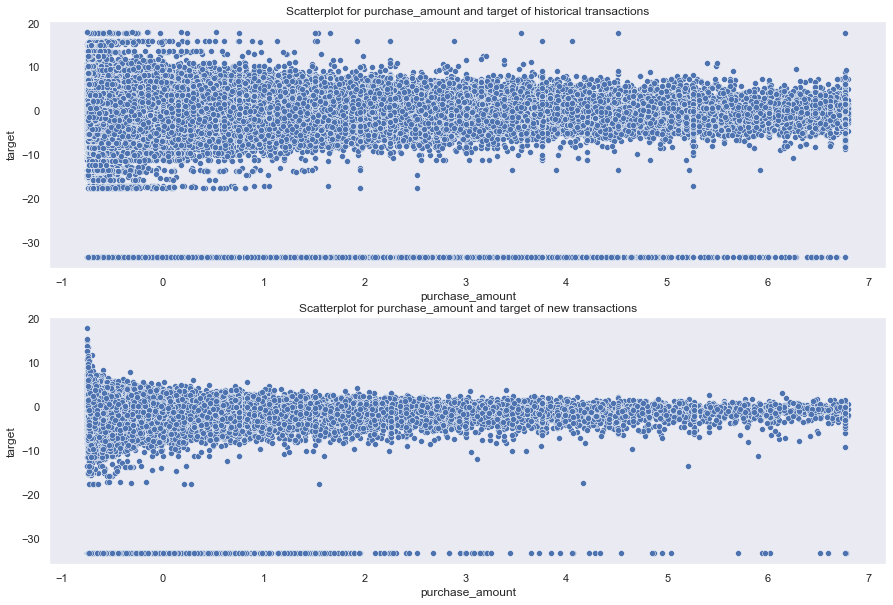

In [42]:
plt.figure(figsize = [15,10])
plt.subplot(2,1,1)
sns.scatterplot(data = historical_transactions[historical_transactions['purchase_amount'] < 6.8], x = "purchase_amount",
                y = "target")
plt.title("Scatterplot for purchase_amount and target of historical transactions")
plt.subplot(2,1,2)
sns.scatterplot(data = new_transactions[new_transactions['purchase_amount'] < 6.8], x = "purchase_amount",
                y = "target")
plt.title("Scatterplot for purchase_amount and target of new transactions")
plt.show()

The variance of target with increase in purchase amount seems to be decreasing for both historical transactions and new transactions. The engineered features from purchase amount will be useful for improving model performance.

##### Purchase date column in historical and new transactions

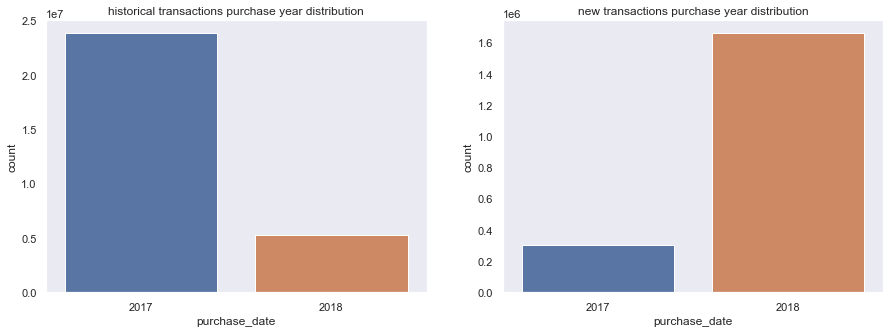

In [43]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.countplot(x = historical_transactions['purchase_date'].dt.year)
plt.title("historical transactions purchase year distribution")
plt.xlabel("purchase year")
plt.subplot(1,2,2)
sns.countplot(x = new_transactions['purchase_date'].dt.year)
plt.title("new transactions purchase year distribution")
plt.xlabel("purchase year")
plt.show()

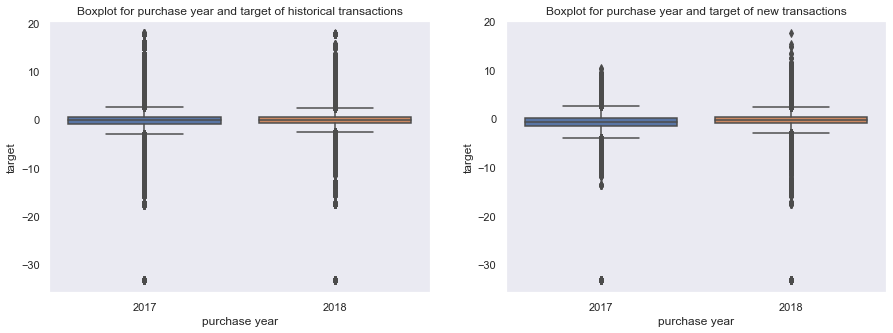

In [44]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.boxplot(x =  historical_transactions['purchase_date'].dt.year, y = historical_transactions['target'])
plt.title("Boxplot for purchase year and target of historical transactions")
plt.xlabel("purchase year")
plt.subplot(1,2,2)
sns.boxplot(x =  new_transactions['purchase_date'].dt.year, y = new_transactions['target'])
plt.title("Boxplot for purchase year and target of new transactions")
plt.xlabel("purchase year")
plt.show()

Most of the historical transactions have purchase year of 2017 while most of the new transactions have purchase year of 2018. This may be due to the fact that the historical transactions took place before the reference date of card_ids while new transactions took place after the reference date of card_ids. The distributions of target with respect to purchase year have little dissimilarities for both historical and new transactions.

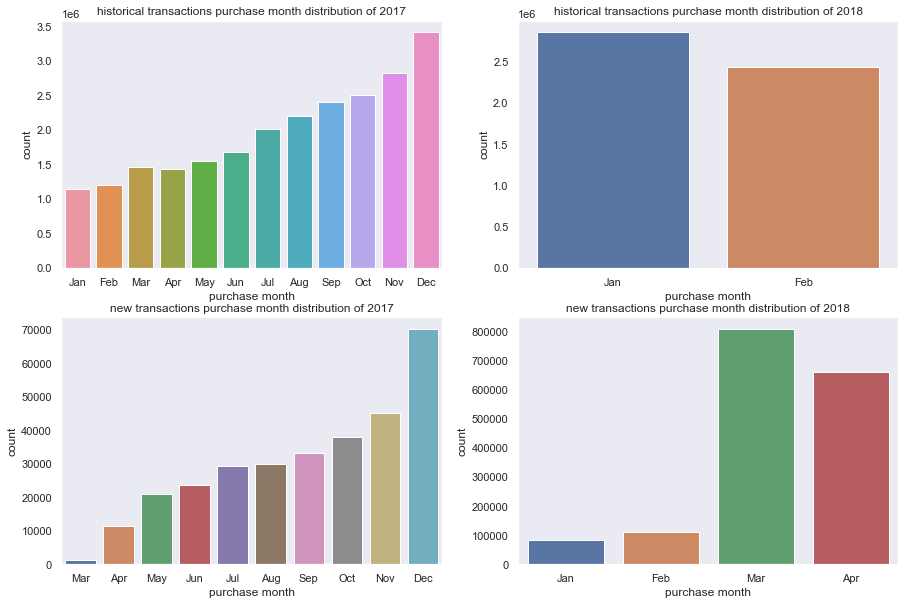

In [45]:
plt.figure(figsize = [15,10])
plt.subplot(2,2,1)
sns.countplot(x = historical_transactions[historical_transactions['purchase_date'].dt.year == 2017]['purchase_date'].dt.month)
plt.title("historical transactions purchase month distribution of 2017")
plt.xticks(range(12), labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("purchase month")
plt.subplot(2,2,2)
sns.countplot(x = historical_transactions[historical_transactions['purchase_date'].dt.year == 2018]['purchase_date'].dt.month)
plt.title("historical transactions purchase month distribution of 2018")
plt.xticks(range(2), labels = ["Jan", "Feb"])
plt.xlabel("purchase month")
plt.subplot(2,2,3)
sns.countplot(x = new_transactions[new_transactions['purchase_date'].dt.year == 2017]['purchase_date'].dt.month)
plt.title("new transactions purchase month distribution of 2017")
plt.xticks(range(10), labels = ["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("purchase month")
plt.subplot(2,2,4)
sns.countplot(x = new_transactions[new_transactions['purchase_date'].dt.year == 2018]['purchase_date'].dt.month)
plt.title("new transactions purchase month distribution of 2018")
plt.xticks(range(4), labels = ["Jan", "Feb", "Mar", "Apr"])
plt.xlabel("purchase month")
plt.show()

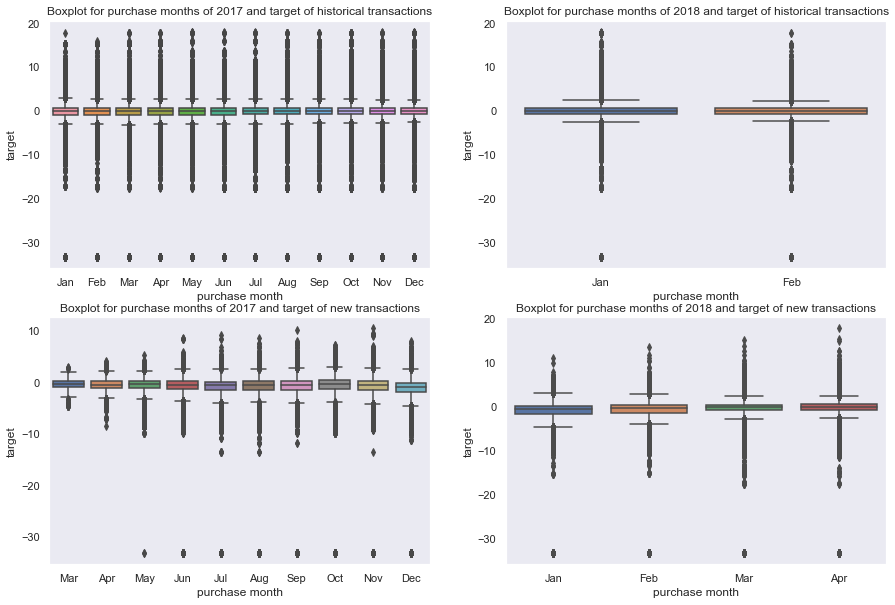

In [46]:
plt.figure(figsize = [15,10])
plt.subplot(2,2,1)
sns.boxplot(x =  historical_transactions[historical_transactions['purchase_date'].dt.year == 2017]['purchase_date'].dt.month,
            y = historical_transactions['target'])
plt.title("Boxplot for purchase months of 2017 and target of historical transactions")
plt.xticks(range(12), labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("purchase month")
plt.subplot(2,2,2)
sns.boxplot(x =  historical_transactions[historical_transactions['purchase_date'].dt.year == 2018]['purchase_date'].dt.month,
            y = historical_transactions['target'])
plt.title("Boxplot for purchase months of 2018 and target of historical transactions")
plt.xticks(range(2), labels = ["Jan", "Feb"])
plt.xlabel("purchase month")
plt.subplot(2,2,3)
sns.boxplot(x =  new_transactions[new_transactions['purchase_date'].dt.year == 2017]['purchase_date'].dt.month,
            y = new_transactions['target'])
plt.title("Boxplot for purchase months of 2017 and target of new transactions")
plt.xticks(range(10), labels = ["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("purchase month")
plt.subplot(2,2,4)
sns.boxplot(x =  new_transactions[new_transactions['purchase_date'].dt.year == 2018]['purchase_date'].dt.month,
            y = new_transactions['target'])
plt.title("Boxplot for purchase months of 2018 and target of new transactions")
plt.xticks(range(4), labels = ["Jan", "Feb", "Mar", "Apr"])
plt.xlabel("purchase month")
plt.show()

Historical transaction contains transaction from January 2017 to February 2018 while new transaction contains transactions from March 2017 to April 2018. There is a continuous increase in number of historical and new transactions with dip in transaction activity in January and February of 2018. Most historical transactions took place during December month of 2017 while most new transactions took place during March month of 2018. The distributions of target with respect to purchase months of 2017 and 2018 are showing small differences for new transactions while they are mostly similar for historical transactions.

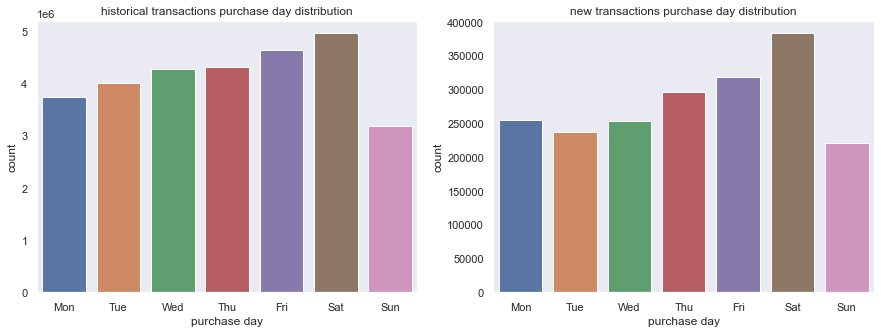

In [47]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.countplot(x = historical_transactions['purchase_date'].dt.dayofweek)
plt.title("historical transactions purchase day distribution")
plt.xticks(range(7), labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xlabel("purchase day")
plt.subplot(1,2,2)
sns.countplot(x = new_transactions['purchase_date'].dt.dayofweek)
plt.title("new transactions purchase day distribution")
plt.xticks(range(7), labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xlabel("purchase day")
plt.show()

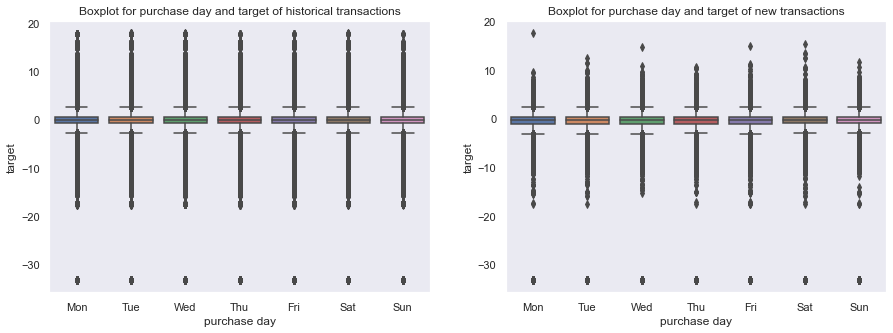

In [48]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.boxplot(x =  historical_transactions['purchase_date'].dt.dayofweek, y = historical_transactions['target'])
plt.title("Boxplot for purchase day and target of historical transactions")
plt.xticks(range(7), labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xlabel("purchase day")
plt.subplot(1,2,2)
sns.boxplot(x =  new_transactions['purchase_date'].dt.dayofweek, y = new_transactions['target'])
plt.title("Boxplot for purchase day and target of new transactions")
plt.xticks(range(7), labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xlabel("purchase day")
plt.show()

Both historical and new transactions shows increase in transactions from Sunday to Saturday. The decrease in transactions on Sunday may be due to the fact that these transactions are mostly physical transactions and not online transactions. The distributions of target with respect to purchase day has small differences for new transactions while they are mostly similar for historical transactions.

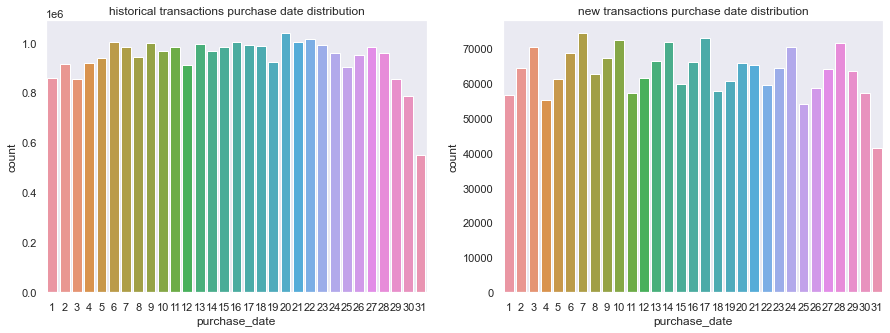

In [49]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.countplot(x = historical_transactions['purchase_date'].dt.day)
plt.title("historical transactions purchase date distribution")
plt.subplot(1,2,2)
sns.countplot(x = new_transactions['purchase_date'].dt.day)
plt.title("new transactions purchase date distribution")
plt.show()

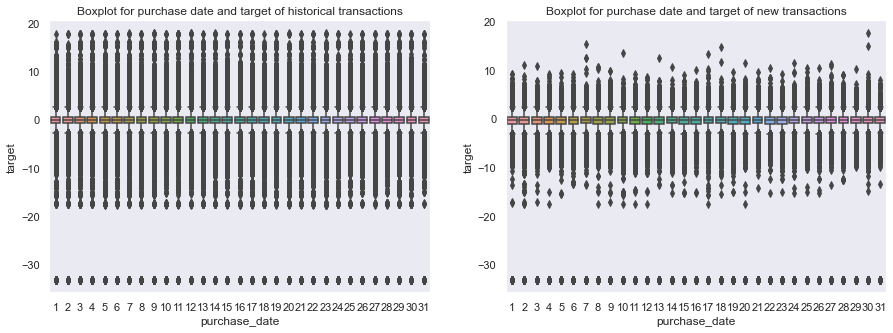

In [50]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.boxplot(x =  historical_transactions['purchase_date'].dt.day, y = historical_transactions['target'])
plt.title("Boxplot for purchase date and target of historical transactions")
plt.subplot(1,2,2)
sns.boxplot(x =  new_transactions['purchase_date'].dt.day, y = new_transactions['target'])
plt.title("Boxplot for purchase date and target of new transactions")
plt.show()

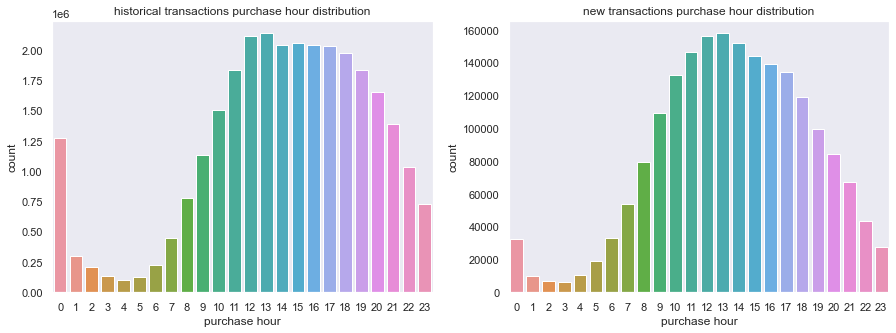

In [51]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.countplot(x = historical_transactions['purchase_date'].dt.hour)
plt.title("historical transactions purchase hour distribution")
plt.xlabel("purchase hour")
plt.subplot(1,2,2)
sns.countplot(x = new_transactions['purchase_date'].dt.hour)
plt.title("new transactions purchase hour distribution")
plt.xlabel("purchase hour")
plt.show()

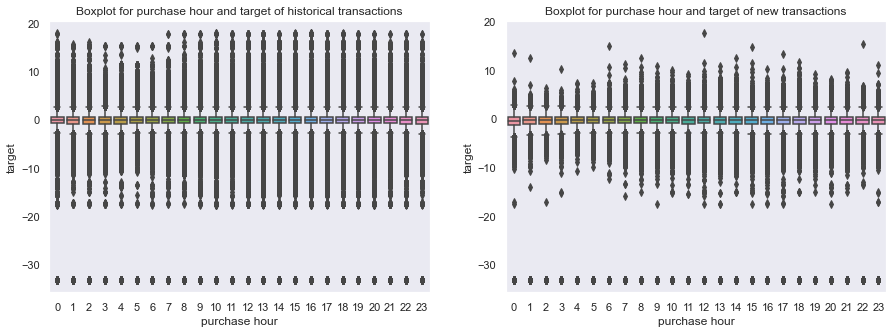

In [52]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.boxplot(x =  historical_transactions['purchase_date'].dt.hour, y = historical_transactions['target'])
plt.title("Boxplot for purchase hour and target of historical transactions")
plt.xlabel("purchase hour")
plt.subplot(1,2,2)
sns.boxplot(x =  new_transactions['purchase_date'].dt.hour, y = new_transactions['target'])
plt.title("Boxplot for purchase hour and target of new transactions")
plt.xlabel("purchase hour")
plt.show()

Both historical and new transactions have similar distribution for the purchase hour. The transaction activity rises round 7-8 AM and starts decreasing around 4-5 PM with a sudden rise at 12 midnight. The increase in transactions at 12 midnight may represent some subscription or auto renewal service.  The distributions of target with respect to purchase hour are similar for historical transactions but have dissimilarities for new transactions.

Engineering different features of purchase date for historical and new transactions can be helpful for the model.

##### Month lag column in historical and new transactions

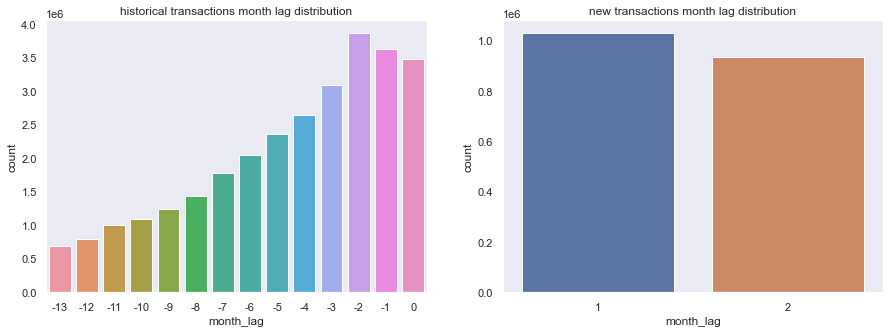

In [53]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.countplot(data = historical_transactions, x = 'month_lag')
plt.title("historical transactions month lag distribution")
plt.subplot(1,2,2)
sns.countplot(data = new_transactions, x = 'month_lag')
plt.title("new transactions month lag distribution")
plt.show()

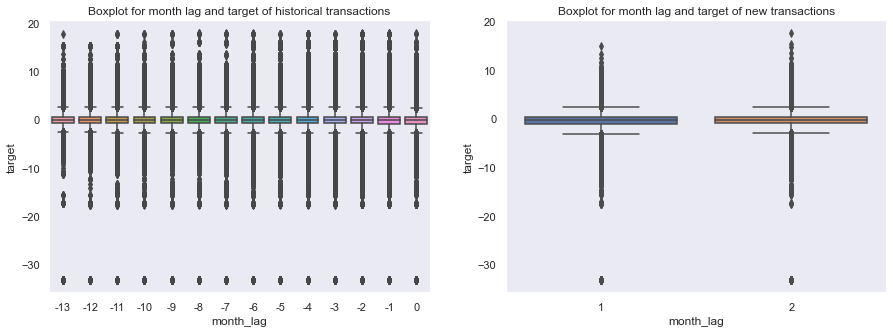

In [54]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.boxplot(x =  historical_transactions['month_lag'], y = historical_transactions['target'])
plt.title("Boxplot for month lag and target of historical transactions")
plt.subplot(1,2,2)
sns.boxplot(x =  new_transactions['month_lag'], y = new_transactions['target'])
plt.title("Boxplot for month lag and target of new transactions")
plt.show()

The historical transactions have month lag from -13 to 0 while new transactions have month lag from 1 to 2. Here month lag is the month difference between the purchase date and the reference date of card_id which performed transaction. Since historical transactions were done before the reference date, they have negative value while new transactions were done after the reference date therefore they have positive value. High value of month lag denotes most recent transaction activity of the cardholder hence will better represent cardholders preferences and likes. The target distributions with respect to month lag shows no differences for both historical and new transactions.

##### Category 1, Category 2 and Category 3 columns of historical and new transactions.

In [55]:
print("Unique Category 1 elements", np.sort(historical_transactions['category_1'].unique()))
print("Unique Category 2 elements", np.sort(historical_transactions['category_2'].unique()))
print("Unique Category 3 elements", historical_transactions['category_3'].unique())

Unique Category 1 elements ['N' 'Y']
Unique Category 2 elements [ 1.  2.  3.  4.  5. nan]
Unique Category 3 elements ['A', 'B', 'C', NaN]
Categories (3, object): ['A', 'B', 'C']


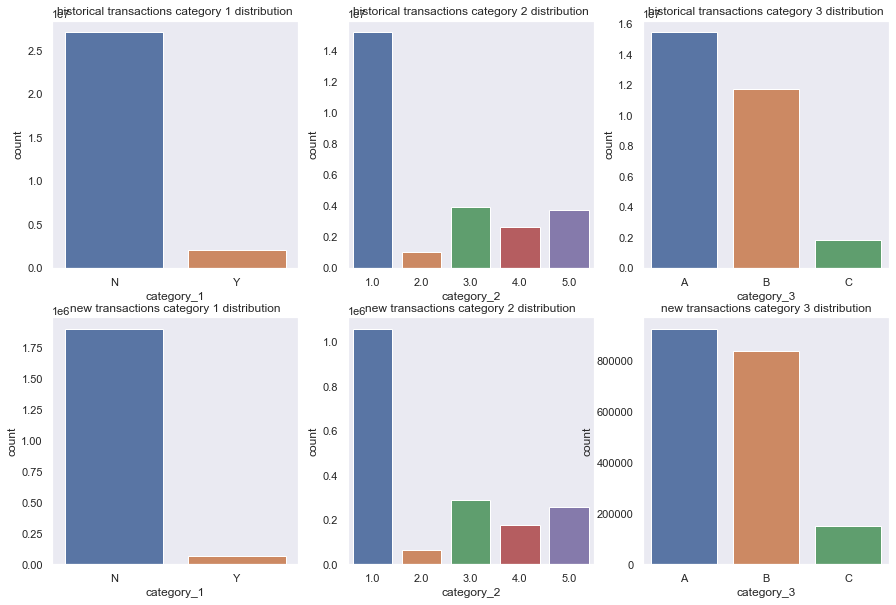

In [56]:
plt.figure(figsize = [15,10])
plt.subplot(2,3,1)
sns.countplot(data = historical_transactions, x = "category_1")
plt.title("historical transactions category 1 distribution")
plt.subplot(2,3,2)
sns.countplot(data = historical_transactions, x = "category_2")
plt.title("historical transactions category 2 distribution")
plt.subplot(2,3,3)
sns.countplot(data = historical_transactions, x = "category_3")
plt.title("historical transactions category 3 distribution")
plt.subplot(2,3,4)
sns.countplot(data = new_transactions, x = "category_1")
plt.title("new transactions category 1 distribution")
plt.subplot(2,3,5)
sns.countplot(data = new_transactions, x = "category_2")
plt.title("new transactions category 2 distribution")
plt.subplot(2,3,6)
sns.countplot(data = new_transactions, x = "category_3")
plt.title("new transactions category 3 distribution")
plt.show()

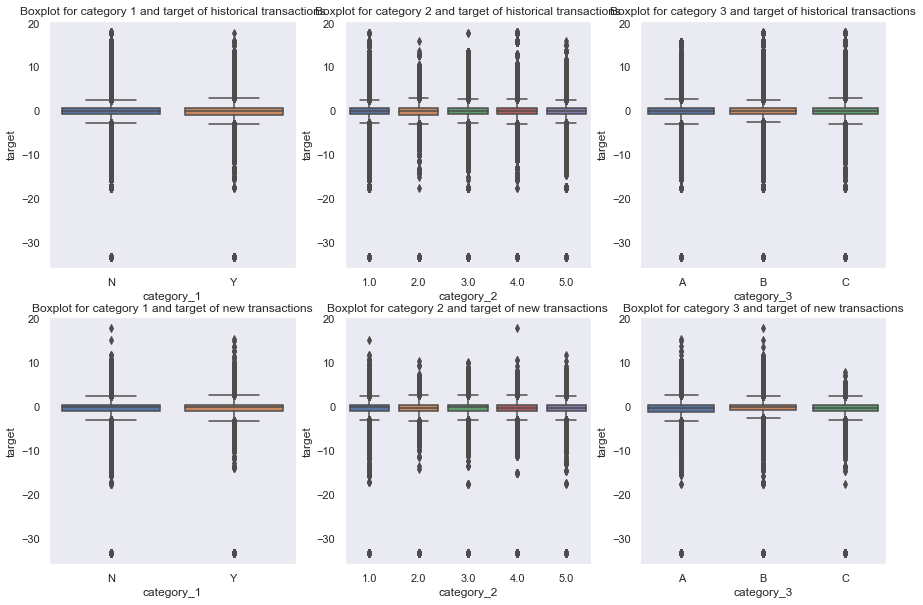

In [57]:
plt.figure(figsize = [15,10])
plt.subplot(2,3,1)
sns.boxplot(x =  historical_transactions['category_1'], y = historical_transactions['target'])
plt.title("Boxplot for category 1 and target of historical transactions")
plt.subplot(2,3,2)
sns.boxplot(x =  historical_transactions['category_2'], y = historical_transactions['target'])
plt.title("Boxplot for category 2 and target of historical transactions")
plt.subplot(2,3,3)
sns.boxplot(x =  historical_transactions['category_3'], y = historical_transactions['target'])
plt.title("Boxplot for category 3 and target of historical transactions")
plt.subplot(2,3,4)
sns.boxplot(x =  new_transactions['category_1'], y = new_transactions['target'])
plt.title("Boxplot for category 1 and target of new transactions")
plt.subplot(2,3,5)
sns.boxplot(x =  new_transactions['category_2'], y = new_transactions['target'])
plt.title("Boxplot for category 2 and target of new transactions")
plt.subplot(2,3,6)
sns.boxplot(x =  new_transactions['category_3'], y = new_transactions['target'])
plt.title("Boxplot for category 3 and target of new transactions")
plt.show()

The distribution of category 1, category 2 and category 3 for both historical and new transaction is similar. Value 'N' and Value '1' dominates the category 1 and category 2 respectively. The distributions of target with respect to category 1, category 2 and category 3 have some dissimilarities for historical and new transactions. These dissimilarities can be useful for the model.

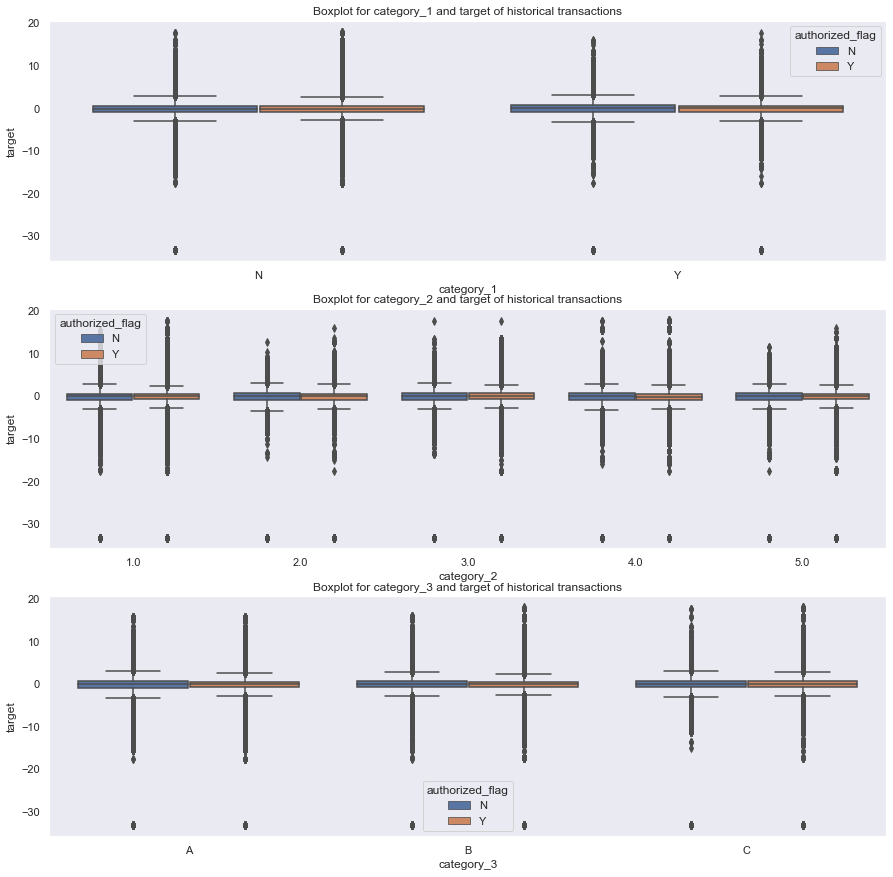

In [69]:
plt.figure(figsize = [15,15])
plt.subplot(3,1,1)
sns.boxplot(data = historical_transactions, x = "category_1", y = "target", hue = "authorized_flag")
plt.title("Boxplot for category_1 and target of historical transactions")
plt.subplot(3,1,2)
sns.boxplot(data = historical_transactions, x = "category_2", y = "target", hue = "authorized_flag")
plt.title("Boxplot for category_2 and target of historical transactions")
plt.subplot(3,1,3)
sns.boxplot(data = historical_transactions, x = "category_3", y = "target", hue = "authorized_flag")
plt.title("Boxplot for category_3 and target of historical transactions")
plt.show()

The distributions of target with respect to category 1, category 2 and category 3 based on authorized flag show dissimilarities for historical transactions.

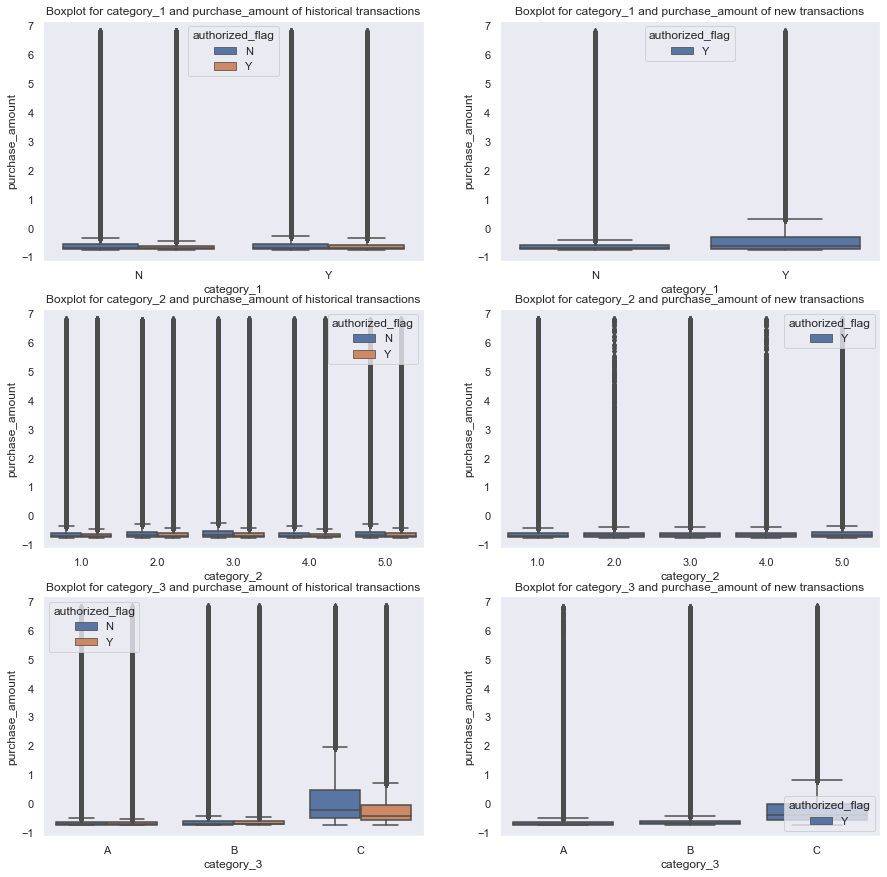

In [71]:
plt.figure(figsize = [15,15])
plt.subplot(3,2,1)
sns.boxplot(data = historical_transactions[historical_transactions['purchase_amount'] < 6.8], x = "category_1",
            y = "purchase_amount", hue = "authorized_flag")
plt.title("Boxplot for category_1 and purchase_amount of historical transactions")
plt.subplot(3,2,2)
sns.boxplot(data = new_transactions[new_transactions['purchase_amount'] < 6.8], x = "category_1",
            y = "purchase_amount", hue = "authorized_flag")
plt.title("Boxplot for category_1 and purchase_amount of new transactions")
plt.subplot(3,2,3)
sns.boxplot(data = historical_transactions[historical_transactions['purchase_amount'] < 6.8], x = "category_2",
            y = "purchase_amount", hue = "authorized_flag")
plt.title("Boxplot for category_2 and purchase_amount of historical transactions")
plt.subplot(3,2,4)
sns.boxplot(data = new_transactions[new_transactions['purchase_amount'] < 6.8], x = "category_2",
            y = "purchase_amount", hue = "authorized_flag")
plt.title("Boxplot for category_2 and purchase_amount of new transactions")
plt.subplot(3,2,5)
sns.boxplot(data = historical_transactions[historical_transactions['purchase_amount'] < 6.8], x = "category_3",
            y = "purchase_amount", hue = "authorized_flag")
plt.title("Boxplot for category_3 and purchase_amount of historical transactions")
plt.subplot(3,2,6)
sns.boxplot(data = new_transactions[new_transactions['purchase_amount'] < 6.8], x = "category_3",
            y = "purchase_amount", hue = "authorized_flag")
plt.title("Boxplot for category_3 and purchase_amount of new transactions")
plt.show()

There are dissimilarities in distribution of purchase amount with respect to category 1, category 2 and category 3 for both historical and new transactions. Category 1 and category 3 along with purchase amount can be used to engineer features for the model.

##### Merchant id, Merchant category id and Subsector id columns of historical and new transactions.

In [58]:
print("Unique Merchant Ids in historical transactions", historical_transactions['merchant_id'].nunique())
print("Unique Merchant Category Ids in historical transactions", historical_transactions['merchant_category_id'].nunique())
print("Unique Subsector Ids in historical transactions", historical_transactions['subsector_id'].nunique())

Unique Merchant Ids in historical transactions 326311
Unique Merchant Category Ids in historical transactions 327
Unique Subsector ids in historical transactions 41


In [59]:
print("Unique Merchant Ids in new transactions", new_transactions['merchant_id'].nunique())
print("Unique Merchant Category Ids in new transactions", new_transactions['merchant_category_id'].nunique())
print("Unique Subsector ids in new transactions", new_transactions['subsector_id'].nunique())

Unique Merchant Ids in new transactions 226129
Unique Merchant Category Ids in new transactions 314
Unique Subsector ids in new transactions 41


Both historical and new transactions have wide range of merchant ids, merchant category ids and subsector ids. The merchant ids, merchant category ids and subsector ids of historical and new transactions will help the model in learning about the likes and preferences of the cardholders.

##### City id and State id columns of historical and new transactions.

In [60]:
print("Unique City Ids in historical transactions", historical_transactions['city_id'].nunique())
print("Unique State Ids in historical transactions", historical_transactions['state_id'].nunique())

Unique City Ids in historical transactions 308
Unique State Ids in historical transactions 25


In [61]:
print("Unique City Ids in new transactions", new_transactions['city_id'].nunique())
print("Unique State Ids in new transactions", new_transactions['state_id'].nunique())

Unique City Ids in new transactions 308
Unique State Ids in new transactions 25


Both historical and new transactions have similar number of city ids and state ids. The city ids and state ids of historical and new transactions will help the model in learning about the locality of the cardholders.

## Merchant

In [62]:
merchant_info = pd.read_excel('Data Dictionary.xlsx', sheet_name = 'merchant')
print("Details of Merchant dataset columns:")
merchant_info

Details of Merchant dataset columns:


,merchants.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,merchant_id,Unique merchant identifier
3,merchant_group_id,Merchant group (anonymized )
4,merchant_category_id,Unique identifier for merchant category (anony...
5,subsector_id,Merchant category group (anonymized )
6,numerical_1,anonymized measure
7,numerical_2,anonymized measure
8,category_1,anonymized category
9,most_recent_sales_range,Range of revenue (monetary units) in last acti...


The merchant details are provided in the merchant dataset which contains additional information about all merchants. This however is of little use to our problem since we have to learn about cardholders i.e., customers not merchants. Although category and location of merchants can provide information about likes, behavior and locality of cardholders. Since these are already present in transaction datasets therefore, we can ignore the merchant dataset.

## Observations:
1. The features provided in the train and test set will not be much of help with the model.
2. The target variable have few extreme outliers which have to be dealt with to prevent degradation of model performance.
3. We have to engineer features from historical and new transactions for our model.
4. Historical and new transactions have missing values in category 2, category 3 and merchant id columns which needs to be imputed.
5. Both historical and new transactions have similar distributions for most of the columns except purchase date, month lag and authorized flag columns.
6. Purchase amount, installments and authorized flag columns are most useful for engineering features for the model.
7. The merchant dataset is not useful for the model as it contains details of merchants and not of cardholders.